<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Laptop_model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(path, header=0)

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
lm = LinearRegression()
X = df[['CPU_frequency']]
Y = df[['Price']]
lm.fit(X, Y)
Yhat = lm.predict(X)

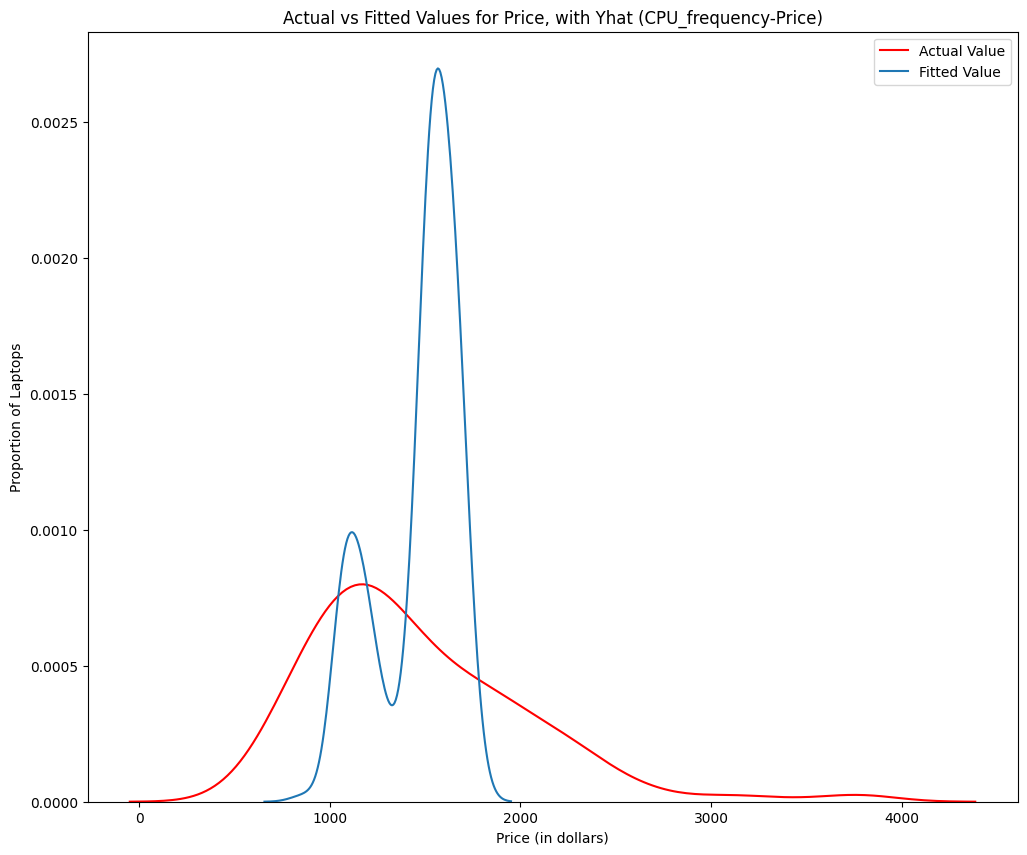

In [5]:
width = 12
height = 10

plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['Price'], color='r', label='Actual Value')
sns.kdeplot(Yhat, color='b', label='Fitted Value', ax=ax1)

plt.title('Actual vs Fitted Values for Price, with Yhat (CPU_frequency-Price)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Laptops')

plt.legend()

plt.show()
plt.close()

In [6]:
mse_slr = mean_squared_error(Y, Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is:', r2_score_slr)
print('The mean square error of price and predicted value is:', mse_slr)

The R-square for Linear Regression is: 0.1344436321024326
The mean square error of price and predicted value is: 284583.4405868629


In [7]:
lm1 = LinearRegression()
X1 = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']]
Y = df[['Price']]
lm1.fit(X1, Y)
Yhat1 = lm1.predict(X1)

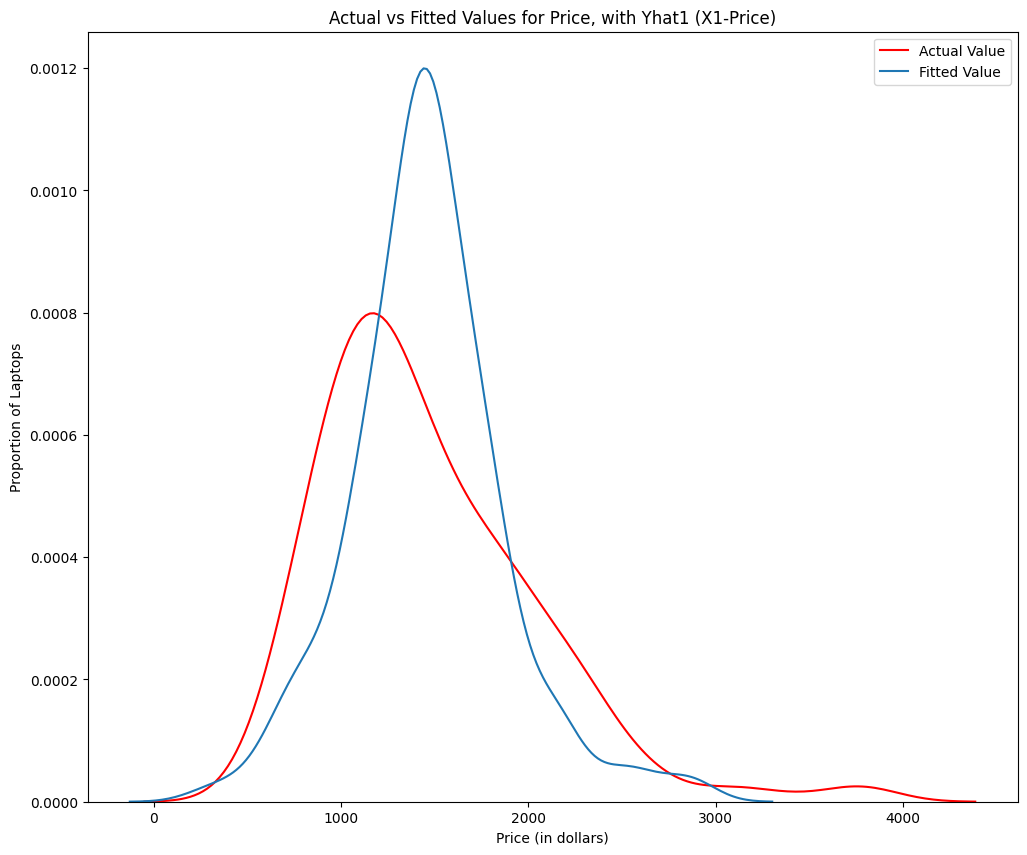

In [8]:
plt.figure(figsize=(width,height))

ax2 = sns.kdeplot(df['Price'], color='r', label='Actual Value')
sns.kdeplot(Yhat1, color='b', label='Fitted Value', ax=ax2)

plt.title('Actual vs Fitted Values for Price, with Yhat1 (X1-Price)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Laptops')

plt.legend()

plt.show()
plt.close()

In [9]:
mse_mlr = mean_squared_error(Y, Yhat1)
r2_score_mlr = lm1.score(X1, Y)
print('The R-square for Multiple Linear Regression is:', r2_score_mlr)
print('The mean square error of price and predicted value is:', mse_mlr)

The R-square for Multiple Linear Regression is: 0.5082509055187374
The mean square error of price and predicted value is: 161680.57263893107


In [10]:
#Make it suitable for numpy calculation. Alternatively, X = df['CPU_frequency']
X = df[['CPU_frequency']]
X = X.to_numpy().flatten()
Y = df[['Price']]
Y = Y.to_numpy().flatten()
#Here we use a polynomial of various degrees (1,3,5)
#First we make the fit that produces the coefficients "f"
f1 = np.polyfit(X,Y,1)
#then we produce the polynomial function "p", using the coefficients "f"
p1 = np.poly1d(f1)
f3 = np.polyfit(X,Y,3)
p3 = np.poly1d(f3)
f5 = np.polyfit(X,Y,5)
p5 = np.poly1d(f5)
print("The 1st degree polynomial is: p1(x)=\n", p1)
print("The 3rd degree polynomial is: p3(x)=\n", p3)
print("The 5th degree polynomial is: p5(x)=\n", p5)

The 1st degree polynomial is: p1(x)=
  
1485 x + 253.7
The 3rd degree polynomial is: p3(x)=
            3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238
The 5th degree polynomial is: p5(x)=
            5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


In [11]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
  x_new = np.linspace(independent_variable.min(), independent_variable.max(),100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
  plt.title(f'Polynomial Fit for Price ~ {Name}')
  ax = plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel(Name)
  plt.ylabel('Price of laptops')

  plt.show()
  plt.close()

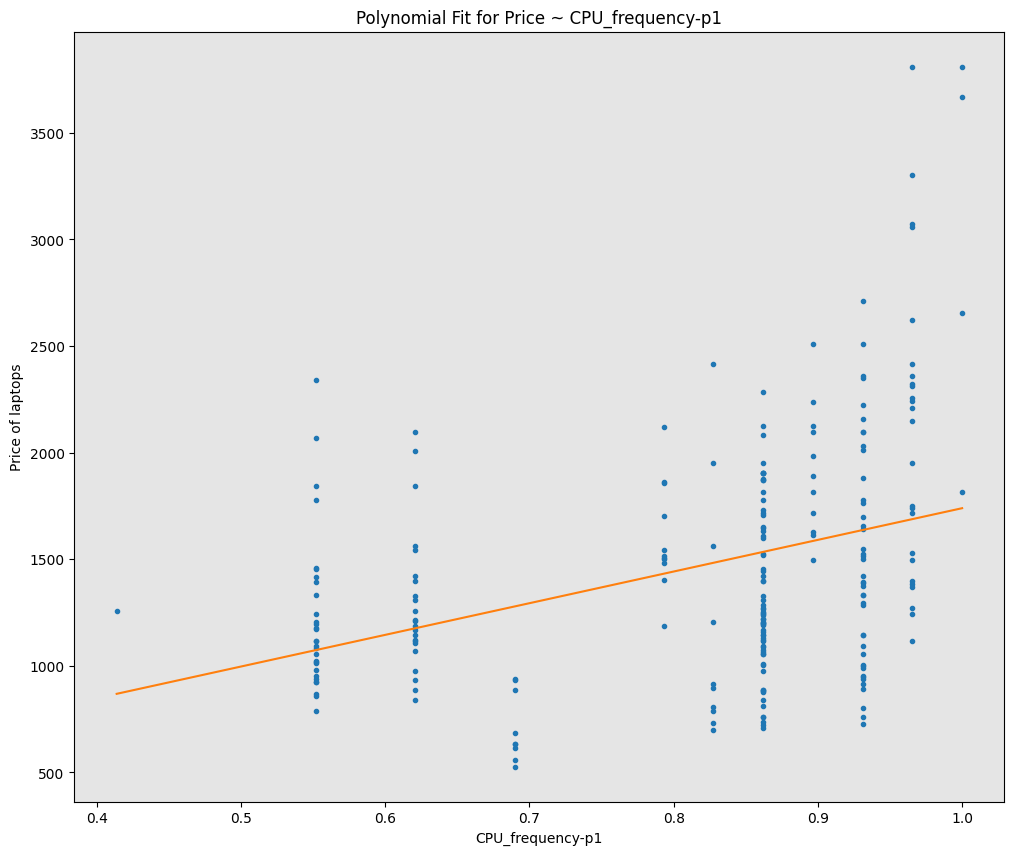

The R-square value for p(x) is: 0.1344436321024326
The mean square error of the observed price and it's predicted value is: 284583.4405868629


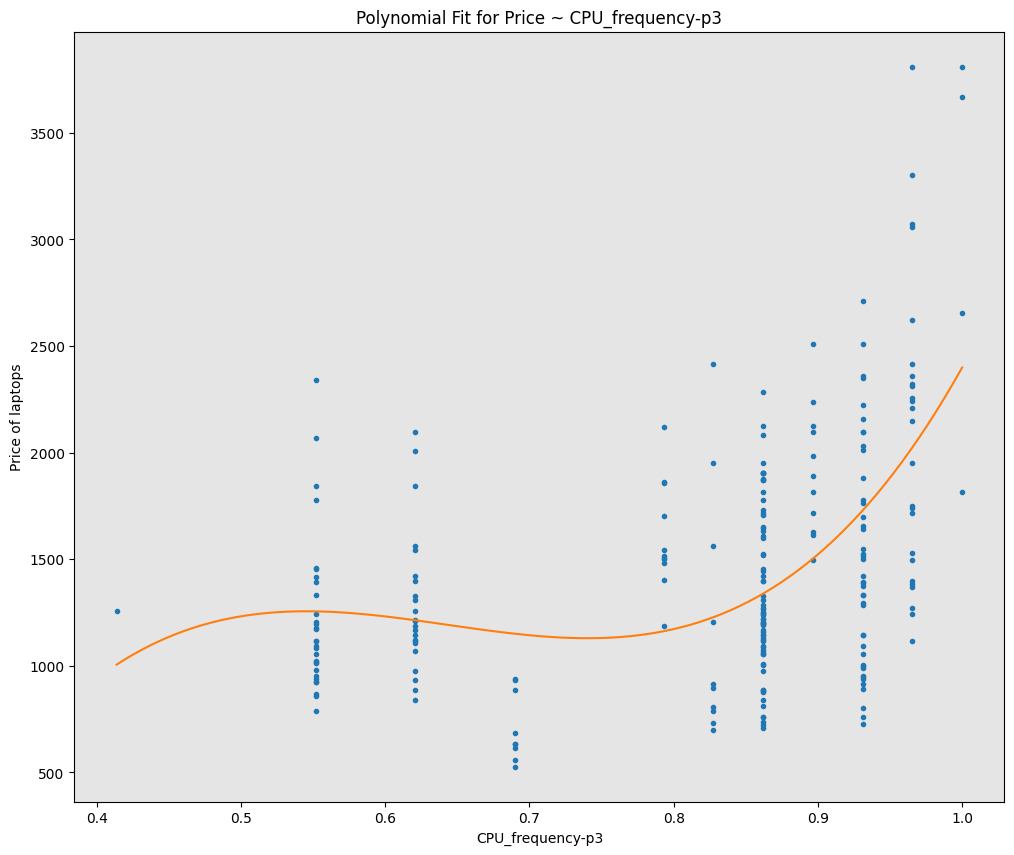

The R-square value for p(x) is: 0.26692640796531175
The mean square error of the observed price and it's predicted value is: 241024.86303848747


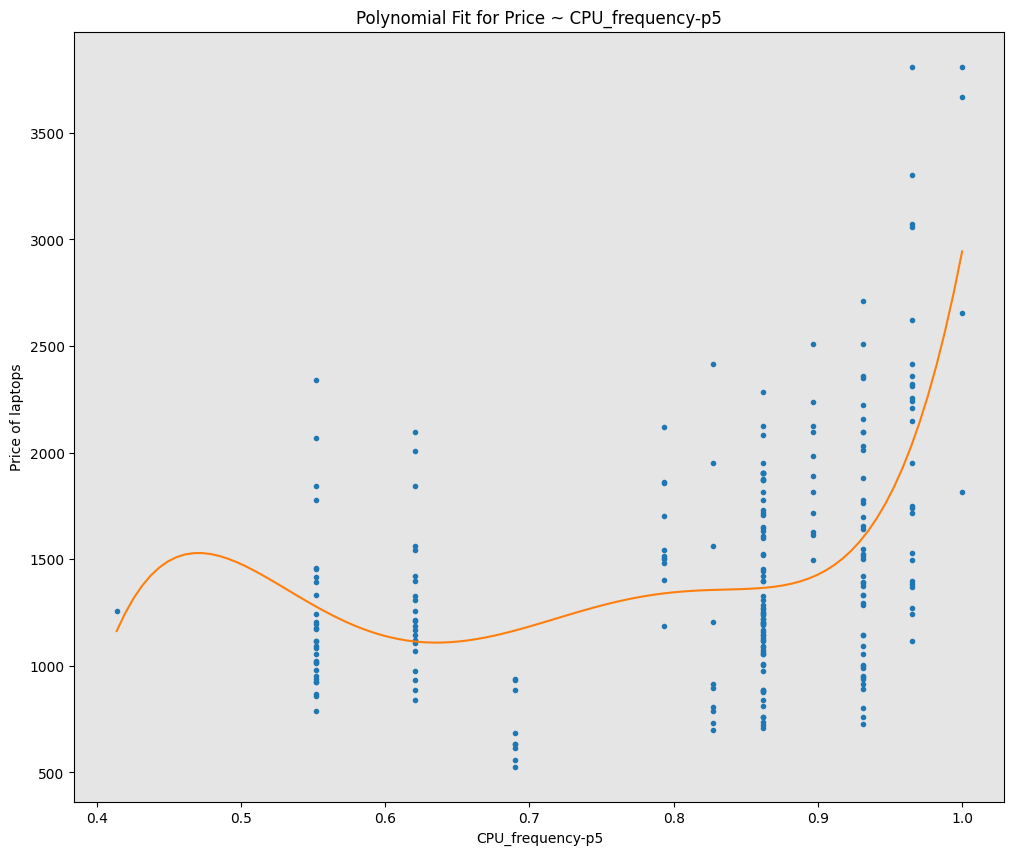

The R-square value for p(x) is: 0.3030822706443108
The mean square error of the observed price and it's predicted value is: 229137.2954805611


In [12]:

models = [p1, p3, p5]
names = ['CPU_frequency-p1', 'CPU_frequency-p3', 'CPU_frequency-p5']
for model, name in zip(models, names):
  plt.figure(figsize=(width,height))
  PlotPolly(model, X, Y, name)
  print('The R-square value for p(x) is:', r2_score(Y, model(X)))
  print('The mean square error of the observed price and it\'s predicted value is:', mean_squared_error(Y, model(X)))

In [13]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
X1 = X1.astype(float)
pipe.fit(X1, Y)
ypipe1 = pipe.predict(X1)

In [14]:
mse_pipe = mean_squared_error(Y, ypipe1)
r2_score_pipe = r2_score(Y, ypipe1)
print('MSE for multi-variable polynomial pipeline ypipe1 is:', mse_pipe)
print('R^2 for multi-variable polynomial pipeline ypipe1 is:', r2_score_pipe)

MSE for multi-variable polynomial pipeline ypipe1 is: 120608.94676913734
R^2 for multi-variable polynomial pipeline ypipe1 is: 0.633169654263205
